In [2]:
import cv2
import matplotlib.pyplot as plt
import imageio
import numpy as np
import time

In [5]:
#wd
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data


# Read the data

In [6]:
data = np.load("np_data.npy", allow_pickle=True)
print(data.shape)

(1998, 2)


# Check the length of $X$ and $y$

In [8]:
X = []
y = []
for i in data:
  X.append(i[0])
  y.append(i[1])
print(len(X))
print(len(y))
print("The length should be " + str((6984+7000)/7))

1998
1998
The length should be 1997.7142857142858


In [ ]:
print(X)
print(y)

# Visualization

In [ ]:
"""
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()
"""

# Machine Learning Task
## Support Vector machine

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance.

start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) # clf = classifer
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 80% for training, 20 for of testing
clf2 = make_pipeline(StandardScaler(), SVC(gamma='scale', C = 1)) # clf = classifer
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

### SVM Confusion Matrix



[[124  83]
 [ 58 135]]


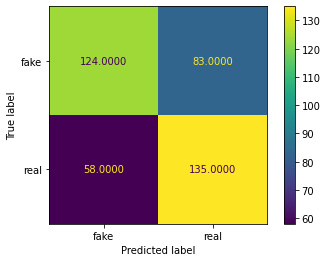

In [14]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test, values_format = '.0f')  
plt.show()

### SVM Accuracy Score and Classification Score

In [13]:
print(accuracy_score(y_test, y_pred))
target_names = ['fake', 'real']
print(classification_report(y_test, y_pred, target_names=target_names))

0.6475
              precision    recall  f1-score   support

        fake       0.68      0.60      0.64       207
        real       0.62      0.70      0.66       193

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400



# References
- https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch05.html#idm45022165153592
- https://github.com/scikit-learn/scikit-learn/issues/16127